# Heart Disease Prediction Assignment - 2

# Project for heart disease prediction and classification.

In this project of a machine learning algorithm to create Gradio interfaces about the topic, the classification task, logistic regression prediction, is one of the leading causes of death worldwide, and it remains a major public health concern. However, diagnosing heart disease often requires multiple clinical tests, expert interpretation, and time management. Although it may not be readily available, given the increasing availability of medical data and learning, it provides opportunities to receive support from healthcare professionals. This project aims to focus on developing a machine learning classification model that predicts whether a patient has heart disease based on a set of medical measurements.

# 1. Import Necessary Libraries

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 2. Loading The Dataset

In [357]:
data = pd.read_csv("/kaggle/input/heart-dataset/heart.csv")
print(data)
print("Dataset Loaded Successfully")

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

# 3. Display All Basics Information

In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [359]:
data.shape

(1025, 14)

In [360]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [361]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [362]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 4. Feature & Target Split

In [363]:
X = data.drop("target", axis=1)
y = data["target"]

In [364]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [365]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# 5. Train-Test Split

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [367]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (820, 13)
Testing set shape: (205, 13)


# 6. Feature Scaling

In [368]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train Classification Model

In [369]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 9. Model Evaluation

In [370]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# 10. Visualization

# 10.1 Confusion Matrix (Model Performance)

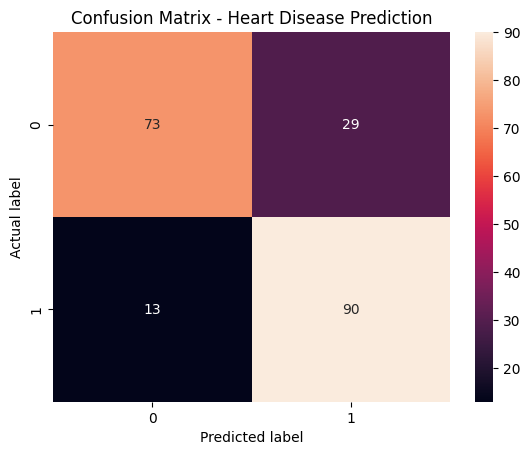

In [371]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", color="red")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()

# 10.2 Class Distribution (Dataset Understanding)

/tmp/ipykernel_144/4290451766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette = 'viridis')


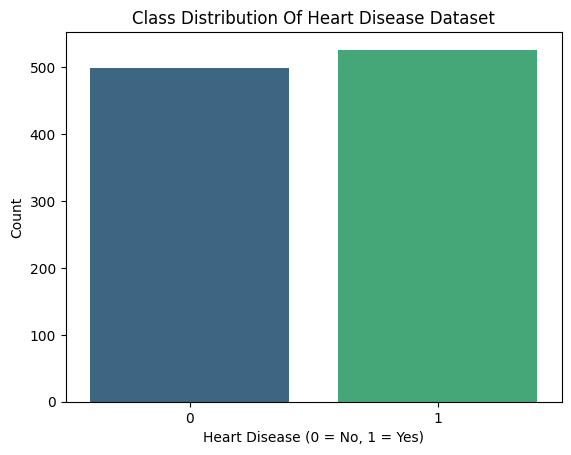

In [372]:
plt.figure()
sns.countplot(x=y, palette = 'viridis')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Class Distribution Of Heart Disease Dataset")
plt.show()

# 10.3 ROC Curve (Classifier Quality)

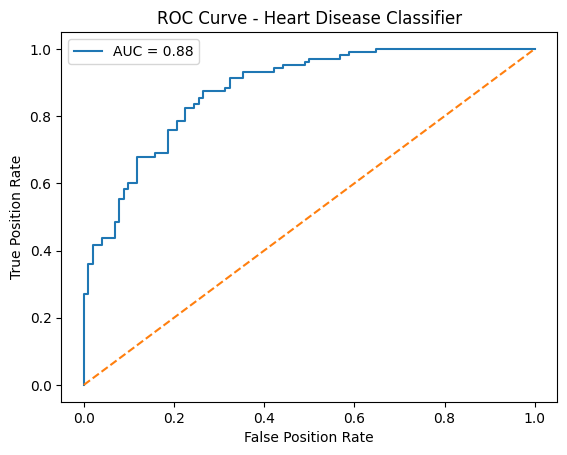

In [373]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Position Rate")
plt.ylabel("True Position Rate")
plt.title("ROC Curve - Heart Disease Classifier")
plt.legend()
plt.show()

# 10.4 Feature Importance (Random Forest)

/tmp/ipykernel_144/99713630.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette = "plasma")


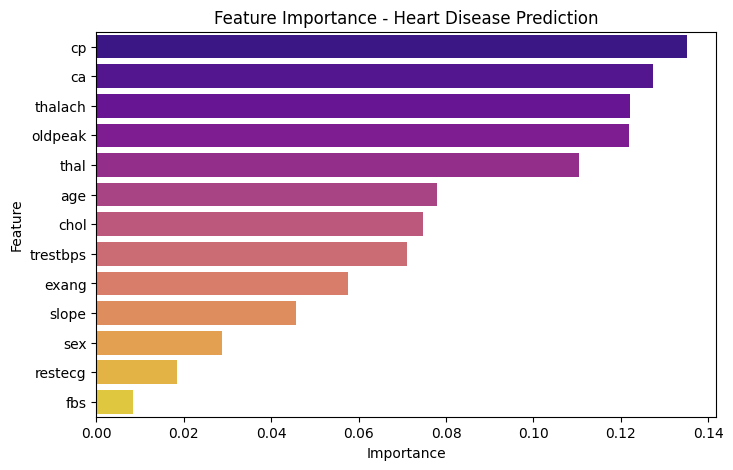

In [374]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features =X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette = "plasma")
plt.title("Feature Importance - Heart Disease Prediction")
plt.show()

# 10.5 Probability Distribution (Model Confidence)

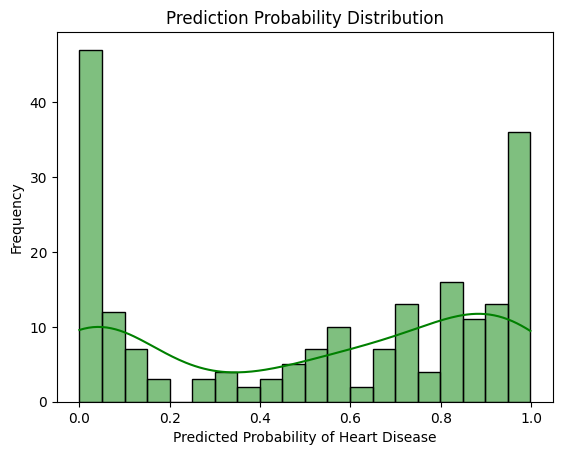

In [375]:
plt.figure()
sns.histplot(y_prob, bins=20, kde=True, color = 'green')
plt.xlabel("Predicted Probability of Heart Disease")
plt.ylabel("Frequency")
plt.title("Prediction Probability Distribution")
plt.show()

# 11. Gradio Prediction Function

In [376]:
def predict_heart_disease(
    age, sex, cp, trestbps, chol, fbs,
    restecg, thalach, exang, oldpeak,
    slope, ca, thal
):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs,
                           restecg, thalach, exang, oldpeak,
                           slope, ca, thal]])
    
    input_scaled = scaler.transform(input_data)
    
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]
    
    status = "Heart Disease Detected" if prediction == 1 else "No Heart Disease Detected"
    
    return status, f"{probability:.2%}"

# 12. Advanced Gradio UI (Tabs + Layout)

In [377]:
with gr.Blocks(theme=gr.themes.Soft()) as app:
    
    gr.Markdown("""
    # Heart Disease Prediction System
    **Machine Learning Classification Application**
    Predicts the likelihood of heart disease based on medical measurements.
    """)
    
    with gr.Tab("Prediction"):
        with gr.Row():
            with gr.Column():
                age = gr.Slider(20, 80, label="Age")
                sex = gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)")
                cp = gr.Dropdown([0, 1, 2, 3], label="Chest Pain Type")
                trestbps = gr.Slider(80, 200, label="Resting Blood Pressure")
                chol = gr.Slider(100, 600, label="Cholesterol")
                fbs = gr.Radio([0, 1], label="Fasting Blood Sugar > 120")
                
            with gr.Column():
                restecg = gr.Dropdown([0, 1, 2], label="Resting ECG")
                thalach = gr.Slider(60, 220, label="Max Heart Rate")
                exang = gr.Radio([0, 1], label="Exercise Induced Angina")
                oldpeak = gr.Slider(0, 6, step=0.1, label="Oldpeak (ST Depression")
                slope = gr.Dropdown([0, 1, 2], label="Slope of ST Segment")
                ca = gr.Dropdown([0, 1, 2, 3, 4], label="Major Vessels")
                thal = gr.Dropdown([0, 1, 2, 3], label="Thalassmia")
                
        predict_btn = gr.Button("Predict Risk", variant="primary")
        
        with gr.Row():
            prediction_output = gr.Textbox(label="Prediction Results")
            probability_output =  gr.Textbox(label="Risk Probability")
            
        predict_btn.click(
            predict_heart_disease,
            inputs=[age, sex, cp, trestbps, chol, fbs,
                   restecg, thalach, exang, oldpeak,
                   slope, ca, thal],
            outputs=[prediction_output, probability_output]
        )
        
    with gr.Tab("About the model"):
        gr.Markdown("""
        ### Model Information
        - **Problem Type:** Classification
        - **Algorithm:** Logistic Regression
        - **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, ROC-AUC
        - **Dataset:** Heart Disease UCI
        
        ### Disclaimer
        This tool is for **educational purposes only** and does not replace professional medical advice.
        """)

app.launch()

* Running on local URL:  http://127.0.0.1:7866
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://3ebad98f9ad69b2d0f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
